In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vyborka_3.csv', sep = ',')

In [4]:
data.head()

,collocation,frequency1,frequency2,frequency,doc_freq,Words_in_dict,TF_IDF,TF-RIDF,NOUN_l,ADJF_l,ADJS_l,COMP_l,VERB_l,INFN_l,PRTF_l,GRND_l,NUMR_l,ADVB_l,NPRO_l,PRED_l,PREP_l,CONJ_l,PRCL_l,INTJ_l,None_l,NOUN_1,ADJF_1,ADJS_1,COMP_1,VERB_1,INFN_1,PRTF_1,GRND_1,NUMR_1,ADVB_1,NPRO_1,PRED_1,PREP_1,CONJ_1,PRCL_1,...,ADJF_r,ADJS_r,COMP_r,VERB_r,INFN_r,PRTF_r,GRND_r,NUMR_r,ADVB_r,NPRO_r,PRED_r,PREP_r,CONJ_r,PRCL_r,INTJ_r,None_r,MI,MI3,T-score,minimum-sens,log_dice,raw_freq,log_likehood,dice,chi_sq,pmi,jaccard,phi,mi_like,poison_stirling,student_t,Words Class,MY_COMBINATION,ALLA_COMBINATION,collections_kolichestvo,weirdness,cw,dw,otnosit_chastota,class
0,на первое,8849,565,48,0.608696,1,10.348790,7.587461,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.798919,13.968844,5.932656,0.005424,-6.615630,0.000001,0,0.000000,0,0,0.002481,0,0,0,1.0,1,0.000000,0.000000,4,4.506593,130.185882,40.038917,1,0
1,в рамка,27729,399,352,0.652174,1,65.344075,65.344041,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.527441,21.446305,17.948129,0.012694,-5.320288,0.000001,0,0.008197,0,0,0.004115,0,0,0,1.0,1,-168910.543180,-281517.571966,4,133.383829,139.152749,101.417062,1,1
2,в вид,27729,1476,561,0.869565,1,34.051488,34.051488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.312635,21.576349,21.301588,0.020232,-4.702071,0.000001,0,0.000104,0,0,0.000052,0,0,0,1.0,1,-123887.522004,-206479.203340,4,5.552579,137.822496,45.930292,1,1
3,в раздел,27729,753,344,0.391304,1,140.174952,140.174905,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.578013,20.430543,16.994171,0.012406,-5.371498,0.000001,0,0.047619,0,0,0.024390,0,0,0,1.0,1,0.000000,0.000000,4,173.355913,128.480285,88.173723,1,1
4,на пример,8849,1599,54,0.608696,1,11.642389,9.286463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.467997,12.977772,4.692117,0.006102,-6.596052,0.000001,0,0.000000,0,0,0.004115,0,0,0,1.0,1,-270632.885528,-451054.809214,4,164.429728,137.356899,101.362715,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   collocation              386 non-null    object 
 1   frequency1               386 non-null    int64  
 2   frequency2               386 non-null    int64  
 3   frequency                386 non-null    int64  
 4   doc_freq                 386 non-null    float64
 5   Words_in_dict            386 non-null    int64  
 6   TF_IDF                   386 non-null    float64
 7   TF-RIDF                  386 non-null    float64
 8   NOUN_l                   386 non-null    int64  
 9   ADJF_l                   386 non-null    int64  
 10  ADJS_l                   386 non-null    int64  
 11  COMP_l                   386 non-null    int64  
 12  VERB_l                   386 non-null    int64  
 13  INFN_l                   386 non-null    int64  
 14  PRTF_l                   

In [0]:
y=data['class'].astype('int')

In [0]:
X = data.drop(['class', 'collocation', 'NOUN_l','ADJF_l','ADJS_l','COMP_l','VERB_l','INFN_l','PRTF_l','GRND_l','NUMR_l','ADVB_l','NPRO_l','PRED_l','PREP_l','CONJ_l','PRCL_l','INTJ_l','None_l','NOUN_r','ADJF_r','ADJS_r','COMP_r','VERB_r','INFN_r','PRTF_r','GRND_r','NUMR_r','ADVB_r','NPRO_r','PRED_r','PREP_r','CONJ_r','PRCL_r','INTJ_r','None_r'], axis=1)
#, 'log_likehood', 'log_dice', 'chi_sq', 'pmi', 'jaccard', 'phi', 'mi_like', 'poison_stirling'
# 'raw_freq', 'log_likehood', 'dice', 'chi_sq', 'pmi', 'jaccard', 'phi', 'mi_like', 'poison_stirling', 'student_t'
#, 'weirdness', 'cw', 'dw'

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   frequency1               386 non-null    int64  
 1   frequency2               386 non-null    int64  
 2   frequency                386 non-null    int64  
 3   doc_freq                 386 non-null    float64
 4   Words_in_dict            386 non-null    int64  
 5   TF_IDF                   386 non-null    float64
 6   TF-RIDF                  386 non-null    float64
 7   NOUN_l                   386 non-null    int64  
 8   ADJF_l                   386 non-null    int64  
 9   ADJS_l                   386 non-null    int64  
 10  COMP_l                   386 non-null    int64  
 11  VERB_l                   386 non-null    int64  
 12  INFN_l                   386 non-null    int64  
 13  PRTF_l                   386 non-null    int64  
 14  GRND_l                   3

In [9]:
X.shape, y.shape

((386, 98), (386,))

In [10]:
X.head()

,frequency1,frequency2,frequency,doc_freq,Words_in_dict,TF_IDF,TF-RIDF,NOUN_l,ADJF_l,ADJS_l,COMP_l,VERB_l,INFN_l,PRTF_l,GRND_l,NUMR_l,ADVB_l,NPRO_l,PRED_l,PREP_l,CONJ_l,PRCL_l,INTJ_l,None_l,NOUN_1,ADJF_1,ADJS_1,COMP_1,VERB_1,INFN_1,PRTF_1,GRND_1,NUMR_1,ADVB_1,NPRO_1,PRED_1,PREP_1,CONJ_1,PRCL_1,INTJ_1,...,NOUN_r,ADJF_r,ADJS_r,COMP_r,VERB_r,INFN_r,PRTF_r,GRND_r,NUMR_r,ADVB_r,NPRO_r,PRED_r,PREP_r,CONJ_r,PRCL_r,INTJ_r,None_r,MI,MI3,T-score,minimum-sens,log_dice,raw_freq,log_likehood,dice,chi_sq,pmi,jaccard,phi,mi_like,poison_stirling,student_t,Words Class,MY_COMBINATION,ALLA_COMBINATION,collections_kolichestvo,weirdness,cw,dw,otnosit_chastota
0,8849,565,48,0.608696,1,10.348790,7.587461,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.798919,13.968844,5.932656,0.005424,-6.615630,0.000001,0,0.000000,0,0,0.002481,0,0,0,1.0,1,0.000000,0.000000,4,4.506593,130.185882,40.038917,1
1,27729,399,352,0.652174,1,65.344075,65.344041,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.527441,21.446305,17.948129,0.012694,-5.320288,0.000001,0,0.008197,0,0,0.004115,0,0,0,1.0,1,-168910.543180,-281517.571966,4,133.383829,139.152749,101.417062,1
2,27729,1476,561,0.869565,1,34.051488,34.051488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.312635,21.576349,21.301588,0.020232,-4.702071,0.000001,0,0.000104,0,0,0.000052,0,0,0,1.0,1,-123887.522004,-206479.203340,4,5.552579,137.822496,45.930292,1
3,27729,753,344,0.391304,1,140.174952,140.174905,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.578013,20.430543,16.994171,0.012406,-5.371498,0.000001,0,0.047619,0,0,0.024390,0,0,0,1.0,1,0.000000,0.000000,4,173.355913,128.480285,88.173723,1
4,8849,1599,54,0.608696,1,11.642389,9.286463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.467997,12.977772,4.692117,0.006102,-6.596052,0.000001,0,0.000000,0,0,0.004115,0,0,0,1.0,1,-270632.885528,-451054.809214,4,164.429728,137.356899,101.362715,1


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [13]:
X_train.shape, y_train.shape

((308, 98), (308,))

#СЛУЧАЙНЫЙ ЛЕС

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Создаём модель леса из сотни деревьев
clf = RandomForestClassifier(n_estimators=10000,
                               max_features = 15
                               )
# Обучаем на тренировочных данных
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.89583333, 0.88541667, 0.80208333, 0.85263158, 0.88421053])

In [28]:
clf.score(X_test, y_test)

0.7948717948717948

#БЭГГИНГ KNN


In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [20]:
clf.score(X_test, y_test)

0.6538461538461539

#ЧРЕЗВЫЧАЙНО РАНДОМИЗИРОВАННЫЕ ДЕРЕВЬЯ

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=None,
                          min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [24]:
clf.score(X_test, y_test)

0.6794871794871795

#ADA BOOST

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [27]:
clf.score(X_test, y_test)

0.6794871794871795

#Gradien Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
            max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
clf.score(X_test, y_test)

0.717948717948718

#SOFT VOTING

In [0]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier



# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf = eclf.fit(X_train, y_train)

In [33]:
clf.score(X_test, y_test)

0.7307692307692307

#Логистическая регрессия

In [0]:
from sklearn.linear_model import LogisticRegression
from pprint import pprint
clf = LogisticRegression(random_state = 8)


In [37]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [38]:
# First create the base model to tune
clf = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#SVM


In [25]:
from sklearn import svm
clf =svm.SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf =KNeighborsClassifier()
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#ТЕСТИРОВАНИЕ РЕЗУЛЬТАТОВ


In [29]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
y_model=clf.predict(X_test)
tp=0
fp=0
fn=0
tn=0
y_t = []
for i in y_test:
  y_t.append(int(i))
for i in range(1,len(y_model)):
  if y_t[i] == 1 and y_t[i] == y_model[i]:
    tp+=1
  elif y_t[i] == 1:
    fn+=1
  elif y_t[i] == 0 and y_t[i] == y_model[i]:
    tn+=1
  else:
    fp+=1
if tp+fp>0:
  tochnost = tp/(tp+fp)
else:
  tochnost=0
if tp+fn>0:
  polnota = tp/(tp+fn)
else:
  polnota = 0
f_measure = 2*tochnost*polnota/(tochnost+polnota)

print('Точность=', tochnost, '; Полнота=', polnota, ';  F-мера=', f_measure)
corr, _ = spearmanr(y_model, y_test)
print('Spearmans correlation: %.3f' % corr)
corr, _ = pearsonr(y_model, y_test)
print('Pearsons correlation: %.3f' % corr)



Точность= 0.84 ; Полнота= 0.6363636363636364 ;  F-мера= 0.7241379310344828
Spearmans correlation: 0.580
Pearsons correlation: 0.580


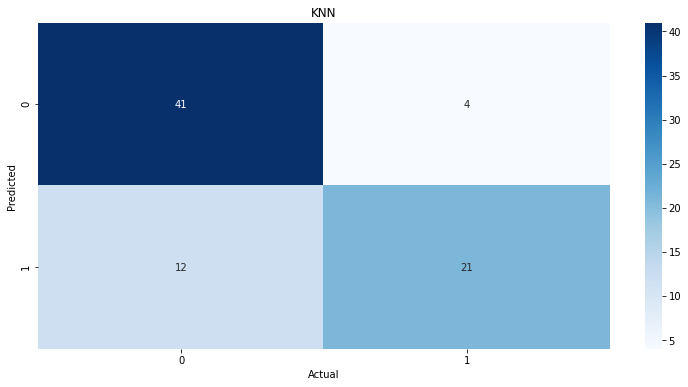

In [30]:
rfc_pred = clf.predict(X_test)
aux_df = data[['class']].drop_duplicates().sort_values('class')
conf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['class'].values, 
            yticklabels=aux_df['class'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('KNN')
plt.show()

#ВЫГРУЗКА КЛАССИФИКАТОРА В ФАЙЛ

In [0]:
# save the model to disk
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/Классификаторы/model_soft_voting_vyb_2_1.sav'
pickle.dump(clf, open(filename, 'wb'))

#ЗАГРУЗКА КЛАССИФИКАТОРА ИЗ ФАЙЛА

In [0]:
# load the model from disk
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/Классификаторы/model_1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#ПРИМЕНЕНИЕ КЛАССИФИКАТОРА

In [0]:
data2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/merge_colloc_new.csv', sep=';')

In [16]:
data2.head()

,collocation,frequency1,frequency2,frequency,doc_freq,Words_in_dict,TF_IDF,TF-RIDF,NOUN_l,ADJF_l,ADJS_l,COMP_l,VERB_l,INFN_l,PRTF_l,GRND_l,NUMR_l,ADVB_l,NPRO_l,PRED_l,PREP_l,CONJ_l,PRCL_l,INTJ_l,None_l,NOUN_1,ADJF_1,ADJS_1,COMP_1,VERB_1,INFN_1,PRTF_1,GRND_1,NUMR_1,ADVB_1,NPRO_1,PRED_1,PREP_1,CONJ_1,PRCL_1,...,NOUN_r,ADJF_r,ADJS_r,COMP_r,VERB_r,INFN_r,PRTF_r,GRND_r,NUMR_r,ADVB_r,NPRO_r,PRED_r,PREP_r,CONJ_r,PRCL_r,INTJ_r,None_r,MI,MI3,T-score,minimum-sens,log_dice,raw_freq,log_likehood,dice,chi_sq,pmi,jaccard,phi,mi_like,poison_stirling,student_t,Words Class,MY_COMBINATION,ALLA_COMBINATION,collections_kolichestvo,weirdness,cw,dw,otnosit_chastota
0,вычислительный математика,539,46,20,0.391304,0,8.149707,3.431230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.191587,17.835444,4.464488,0.037106,-3.870365,0.000003,0,0.000000,0,0,0.100000,0,0,0,1.414214,0,-689990.168478,-772977.656594,2,0.000000,109.414113,64.882955,1
1,математика и,46,19210,22,0.391304,0,8.964677,4.331931,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.173663,13.092526,4.430511,0.001145,-8.773589,0.000003,0,0.004950,0,0,0.002481,0,0,0,1.414214,0,-99446.453366,-165744.088943,4,21.297565,125.186353,60.762230,1
2,машина тьюринг,704,154,126,0.260870,0,73.530650,73.301624,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.718425,23.672984,11.211648,0.178977,-1.767554,0.000003,0,0.000000,0,0,0.015152,0,0,0,1.414214,0,-308135.577892,-296855.084674,2,0.000000,99.436326,52.689929,1
3,и алгоритм,19210,1263,22,0.434783,0,7.958012,3.325266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.605414,8.313449,-2.445657,0.001145,-8.862003,0.000001,0,0.000000,0,0,0.000596,0,0,0,1.000000,0,0.000000,0.000000,2,0.000000,114.924989,73.041967,1
4,решение задача,746,916,64,0.521739,1,18.082982,16.307612,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.085127,18.085127,7.882162,0.069869,-3.698705,0.000001,0,0.047619,0,0,0.024390,0,0,0,1.000000,0,-847422.315050,-673366.283736,4,512.550952,136.287335,112.476769,1


In [0]:
#'weirdness', 'cw', 'dw',
#'raw_freq','weirdness', 'cw', 'dw','otnosit_chastota', 'log_likehood', 'dice', 'chi_sq', 'pmi', 'jaccard', 'phi', 'mi_like', 'poison_stirling', 'student_t',
#'log_likehood', 'log_dice', 'chi_sq', 'pmi', 'jaccard', 'phi', 'mi_like', 'poison_stirling',
X2 = data2.drop([ 'collocation', 'NOUN_l','ADJF_l','ADJS_l','COMP_l','VERB_l','INFN_l','PRTF_l','GRND_l','NUMR_l','ADVB_l','NPRO_l','PRED_l','PREP_l','CONJ_l','PRCL_l','INTJ_l','None_l','NOUN_r','ADJF_r','ADJS_r','COMP_r','VERB_r','INFN_r','PRTF_r','GRND_r','NUMR_r','ADVB_r','NPRO_r','PRED_r','PREP_r','CONJ_r','PRCL_r','INTJ_r','None_r'], axis=1)

In [18]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   frequency1               4692 non-null   int64  
 1   frequency2               4692 non-null   int64  
 2   frequency                4692 non-null   int64  
 3   doc_freq                 4692 non-null   float64
 4   Words_in_dict            4692 non-null   int64  
 5   TF_IDF                   4692 non-null   float64
 6   TF-RIDF                  4692 non-null   float64
 7   NOUN_1                   4692 non-null   int64  
 8   ADJF_1                   4692 non-null   int64  
 9   ADJS_1                   4692 non-null   int64  
 10  COMP_1                   4692 non-null   int64  
 11  VERB_1                   4692 non-null   int64  
 12  INFN_1                   4692 non-null   int64  
 13  PRTF_1                   4692 non-null   int64  
 14  GRND_1                  

In [0]:
y2 = clf.predict(X2)

In [0]:
f=open('/content/drive/My Drive/Colab Notebooks/result_ML_random_forest3.txt','w')
for i in range(len(y2)):
  f.write(str(y2[i]))
  f.write('\n')
  #print(y2[i])
f.close()

In [34]:
colloc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/merge_colloc_new.csv', sep=';')
colloc = colloc['collocation']
j=0
result1=dict()
for i in y2:
  if int(i) == 1:
    result1[colloc[j]]=1
  j+=1
result = []
for i in result1:
  result.append(i)
f2=['иметь отношение','сделать вывод','привлекать внимание','оказывать влияние','приводить к','уступить место','заложить основа','играть роль','поставить задача','принять решение','принимать форма','принимать участие','иметь место','а также','более тот','большой часть','большой количество','большой разнообразие','быть обусловленный','быть характерный','в будущее','в выражение','в дальнейший','в действительность','в диапазон','в единица','в итог','в область','в общий','в основный','в остальной','в отношение','в польза','в понятие','в предел','в принцип','в противоположность','в результат','в средний','в течение','в целое','в частность','влиять на','в время','возрастать до','вообще говорить','вот почему','вследствие что','делать вывод','для удобство','другой слово','за исключение','за счёт','задолго до','значительно большой','значительно выше','значительно ниже','значительно поздний','значительный количество','иметь возможность','иметь значение','иметь значение','как таковой','кроме тот','между прочить','много раз','на основание','на практика','наряду с','не учитывать','общий число','ответственный за','переходить к','переходить на','по дать','по мнение','по способ','по существо','под действие','подводить итог','представлять интерес','прежде всего','с помощь','с успех','с учёт','с цель','следующий образ','с время','ссылаться на','такой образ','тем более','то есть','точка зрение','точнее говорить','уделять внимание','экспериментальный метод','являться результат','являться следствие']
r = []
for i in result:
  if not(i in f2):
    r.append([i])
resultaty = {'collocation': r}  
filename = '/content/drive/My Drive/Colab Notebooks/Результаты/res_леса_деревьев_vyb_3.csv'


df = pd.DataFrame(resultaty, columns= ['collocation'])

df.to_csv (filename, index = False, header=True)

print (df)

            collocation
0        [математика и]
1      [машина тьюринг]
2      [решение задача]
3          [введение в]
4             [в рамка]
...                 ...
1130            [в ход]
1131          [друг на]
1132   [обратный связь]
1133      [адаптация к]
1134  [образоваться из]

[1135 rows x 1 columns]


#ВЫДЕЛИТЬ КЛАСС В ОТДЕЛЬНЫЙ ФАЙЛ

In [0]:
r = []
result=data['collocation']
for i in result:
    r.append(i)
r1 = []
result=data['class']
for i in result:
    r1.append(i)
resultaty = {'collocation': r, 'class': r1}  
filename = '/content/drive/My Drive/Colab Notebooks/Результаты/class.csv'


df = pd.DataFrame(resultaty, columns= ['collocation', 'class'])

df.to_csv (filename, index = False, header=True)